In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('sentences.csv', sep='\t', encoding='utf8', index_col=0, names=['lang', 'text'])

In [3]:
# view dataframe
df.head()

,lang,text
1,cmn,我們試試看！
2,cmn,我该去睡觉了。
3,cmn,你在干什麼啊？
4,cmn,這是什麼啊？
5,cmn,今天是６月１８号，也是Muiriel的生日！


In [4]:
# view size of df
df.shape

(9699409, 2)

In [5]:
# determine how many languages and rows for each language there are
df['lang'].value_counts()

eng    1494130
rus     856008
ita     789990
tur     710012
epo     661648
        ...   
nys          1
ryu          1
lou          1
oji          1
cyo          1
Name: lang, Length: 398, dtype: int64

In [6]:
# subset data for only 5 languages
# this way the dataset won't be too large & will work on my computer
# These are common languages worldwide
languages = ['eng', 'spa', 'deu', 'fra', 'ita']

df = df[df['lang'].isin(languages)]

In [7]:
# view new df
df.head()

,lang,text
77,deu,Lass uns etwas versuchen!
78,deu,Ich muss schlafen gehen.
80,deu,Was ist das?
81,deu,Heute ist der 18. Juni und das ist der Geburts...
82,deu,"Herzlichen Glückwunsch zum Geburtstag, Muiriel!"


In [8]:
# view count for each language
df['lang'].value_counts()

eng    1494130
ita     789990
deu     558479
fra     467842
spa     342454
Name: lang, dtype: int64

In [9]:
# view size of new df
df.shape

(3652895, 2)

Text(0.5, 1.0, 'Language Comparison')

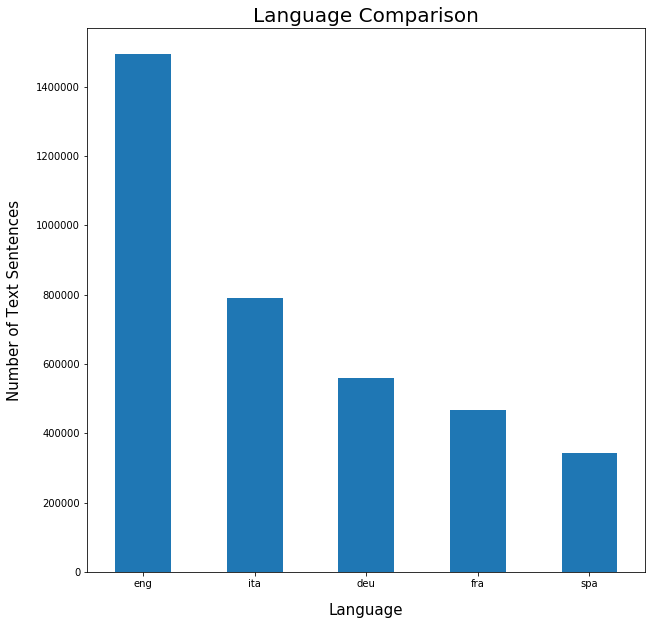

In [10]:
# bar chart to compare languages
df['lang'].value_counts().plot(kind='bar', figsize=(10, 10), rot=0)
plt.xlabel("Language", labelpad=14, fontsize=15)
plt.ylabel("Number of Text Sentences", labelpad=14, fontsize=15)
plt.title("Language Comparison", fontsize=20)


## Data Preparation
#### Below I select 50,000 data points for each of the five languages. I also remove any punctuation from the text.

In [11]:
# create new dataframe to select equal amount of rows per language
data = pd.DataFrame(columns=['lang', 'text'])

for l in languages:
    lang = df[df['lang'] == l].sample(50000, random_state = 100)
    data = data.append(lang)
    

data['lang'].value_counts()

fra    50000
eng    50000
ita    50000
deu    50000
spa    50000
Name: lang, dtype: int64

In [12]:
# remove punctuation from all text
data['text'] = data['text'].str.replace(r'[^\w\s]+', '')

In [13]:
# view/make sure punctuation was removed
data.head(10)

,lang,text
4264763,eng,A concept is an idea that can be represented b...
9099072,eng,Please dont tell me youre serious
8334374,eng,Tom was one of those present
3627522,eng,Is the richest country in the European Union r...
1898133,eng,They want to have a meeting with you
8145212,eng,Algeria has no autonomous provinces
7681743,eng,This stance justifies several points of view
4910945,eng,Try harder to find the answer there must be one
7320987,eng,Sami called me six days later
3448569,eng,The back of Toms right hand was injured by a s...


In [14]:
# split data into train (70%), test (10%), validation sets (20%)
new_df = data.sample(frac=1)

train = new_df[0:175000]
validation = new_df[175000:225000]
test = new_df[225000:250000]

## Feature Engineering
#### Transform the dataset into a form that a Neural Network can understand

In [15]:
# character n-grams with training set
# unique list of trigrams
# feature matrix by counting the number of times each trigram occurs in each sentence


In [16]:
# import necessary packages
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# create a function to return a list of the most common trigrams for a given language

def n_grams(corpus, n_feat = 200):
    
    vectorizer = CountVectorizer(analyzer = 'char',
                                ngram_range=(3,3), # (3,3) represents trigrams
                                max_features = n_feat)
    
    X = vectorizer.fit_transform(corpus)
    
    feature_names = vectorizer.get_feature_names()
    
    return feature_names

In [18]:
# create loop for trigram lists for each language
features = {}
features_set = set()

for l in languages:
    # filter by language
    corpus = train[train.lang==l]['text']
    # get 200 most frequent trigrams
    ngrams = n_grams(corpus)
    # add to the dictionary & set above
    features[l] = ngrams
    features_set.update(ngrams)
    
    
# create vocab list using feature set
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f] = i
    

In [19]:
# view vocab list & determine the number of unique trigrams
vocab

{'us ': 0,
 ' li': 1,
 's d': 2,
 'et ': 3,
 'str': 4,
 'na ': 5,
 'por': 6,
 's q': 7,
 ' y ': 8,
 'tu ': 9,
 'vou': 10,
 'más': 11,
 'abe': 12,
 'lei': 13,
 'ien': 14,
 'ez ': 15,
 'ant': 16,
 ' va': 17,
 'una': 18,
 'n e': 19,
 'ait': 20,
 'n i': 21,
 'aus': 22,
 'nt ': 23,
 'rea': 24,
 'n s': 25,
 'ebe': 26,
 'oro': 27,
 's e': 28,
 't a': 29,
 'qué': 30,
 'n a': 31,
 'an ': 32,
 'pas': 33,
 'ed ': 34,
 'hr ': 35,
 ' is': 36,
 'och': 37,
 'oin': 38,
 ' pl': 39,
 'ha ': 40,
 'and': 41,
 ' si': 42,
 'a d': 43,
 'ers': 44,
 ' ho': 45,
 'e l': 46,
 'e g': 47,
 'oir': 48,
 ' je': 49,
 'ang': 50,
 'tte': 51,
 'ave': 52,
 'her': 53,
 'auf': 54,
 'wer': 55,
 'ght': 56,
 'i c': 57,
 ' fr': 58,
 'a v': 59,
 'ene': 60,
 'nic': 61,
 'r h': 62,
 'nti': 63,
 'i s': 64,
 's v': 65,
 'go ': 66,
 ' of': 67,
 'men': 68,
 'ind': 69,
 ' be': 70,
 ' ri': 71,
 'au ': 72,
 'in ': 73,
 'ern': 74,
 's n': 75,
 'ti ': 76,
 'e h': 77,
 'ro ': 78,
 'ar ': 79,
 'zio': 80,
 'e q': 81,
 'n h': 82,
 'eux': 83,
 '

### 616 unique trigrams

In [20]:
# training set
# train count vectoriser using vocab
vectorizer = CountVectorizer(analyzer = 'char',
                             ngram_range = (3, 3),
                            vocabulary = vocab)

# create feature matrix for training set
corpus = train['text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

train_feat = pd.DataFrame(data = X.toarray(),columns = feature_names)

In [21]:
train_feat.head()

,us,li,s d,et,str,na,por,s q,y,tu,...,sc,der,ir,à,ar,n v,mo,ost,ti,o c
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Scale feature matrix (min-max scaling)
# https://towardsdatascience.com/deep-neural-network-language-identification-ae1c158f6a7d
train_min = train_feat.min()
train_max = train_feat.max()
train_feat = (train_feat - train_min)/(train_max-train_min)

# Add the target variable 
train_feat['lang'] = list(train['lang'])

In [23]:
# validation set
# scale feature matrix for validation set & min-max scaling
corpus = validation['text']   
X = vectorizer.fit_transform(corpus)

val_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
val_feat = (val_feat - train_min)/(train_max-train_min)
val_feat['lang'] = list(validation['lang'])


In [24]:
val_feat.head()

,us,li,s d,et,str,na,por,s q,y,tu,...,der,ir,à,ar,n v,mo,ost,ti,o c,lang
0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,spa
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,ita
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,spa
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,spa
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,spa


In [25]:
# testing set
# scale feature matrix for test set & min-max scaling
corpus = test['text']   
X = vectorizer.fit_transform(corpus)

test_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
test_feat = (test_feat - train_min)/(train_max-train_min)
test_feat['lang'] = list(test['lang'])

In [26]:
test_feat.head()

,us,li,s d,et,str,na,por,s q,y,tu,...,der,ir,à,ar,n v,mo,ost,ti,o c,lang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,eng
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0,fra
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.2,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,fra
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,ita
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.0,ita


In [27]:
# import more/new packages
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils 

In [28]:
# Change categorical variable with LabelEncoder
# to_categorical from DSC650 book

encoder = LabelEncoder()
encoder.fit(['eng', 'spa', 'deu', 'fra', 'ita'])

def encode(y):
    y_encoded = encoder.transform(y)
    y_new = np_utils.to_categorical(y_encoded)
    return y_new

In [29]:
# import keras for neural network
# DSC650 book helped me create the NN below
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Get training data
# Change languages in training set from categorical
x = train_feat.drop('lang', axis = 1)
y = encode(train_feat['lang'])

In [39]:
x1 = val_feat.drop('lang', axis = 1)
y1 = encode(val_feat['lang'])

In [31]:
# view shape
x.shape, y.shape

((175000, 617), (175000, 5))

In [44]:
# Chapter 3 from Deep Learning With Python by Chollet
# building model 

In [35]:
# Instantiate a model
# large datasets have lower epochs
# input dimension is number of unique trigrams +1
model = Sequential()
model.add(Dense(500, input_dim = 617, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

# Train model
model.fit(x, y, epochs = 25, batch_size = 25)

Epoch 1/25
7000/7000 [==============================] - 30s 4ms/step - loss: 0.0936 - accuracy: 0.9733
Epoch 2/25
7000/7000 [==============================] - 30s 4ms/step - loss: 0.0792 - accuracy: 0.9803
Epoch 3/25
7000/7000 [==============================] - 32s 5ms/step - loss: 0.0982 - accuracy: 0.9818
Epoch 4/25
7000/7000 [==============================] - 31s 4ms/step - loss: 0.0881 - accuracy: 0.9830
Epoch 5/25
7000/7000 [==============================] - 30s 4ms/step - loss: 0.0792 - accuracy: 0.9843
Epoch 6/25
7000/7000 [==============================] - 32s 5ms/step - loss: 0.1099 - accuracy: 0.9854
Epoch 7/25
7000/7000 [==============================] - 32s 5ms/step - loss: 0.0714 - accuracy: 0.9863
Epoch 8/25
7000/7000 [==============================] - 31s 4ms/step - loss: 0.1780 - accuracy: 0.9876
Epoch 9/25
7000/7000 [==============================] - 34s 5ms/step - loss: 0.0660 - accuracy: 0.9883
Epoch 10/25
7000/7000 [==============================] - 32s 5ms/step - l

KeyboardInterrupt: 

In [36]:
# stopped model after 15 epochs because computer was extremely hot & felt like it could crash
# i'll need to use a smaller number of epochs

In [40]:
# Instantiate a model
# large datasets have lower epochs
# input dimension is number of unique trigrams +1
model = Sequential()
model.add(Dense(500, input_dim = 617, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

# Train model
history = model.fit(x, y, epochs = 4, batch_size = 25, validation_data = (x1, y1))

Epoch 1/4
7000/7000 [==============================] - 33s 5ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.0712 - val_accuracy: 0.9790
Epoch 2/4
7000/7000 [==============================] - 32s 5ms/step - loss: 0.0909 - accuracy: 0.9801 - val_loss: 0.0870 - val_accuracy: 0.9809
Epoch 3/4
7000/7000 [==============================] - 33s 5ms/step - loss: 0.1005 - accuracy: 0.9820 - val_loss: 0.0931 - val_accuracy: 0.9802
Epoch 4/4
7000/7000 [==============================] - 33s 5ms/step - loss: 0.0866 - accuracy: 0.9836 - val_loss: 0.0861 - val_accuracy: 0.9812


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

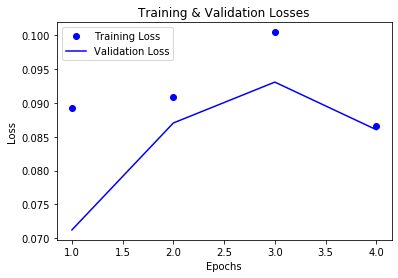

In [43]:
# create training and validation loss plot
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.98132


Text(61.5, 0.5, 'Actual')

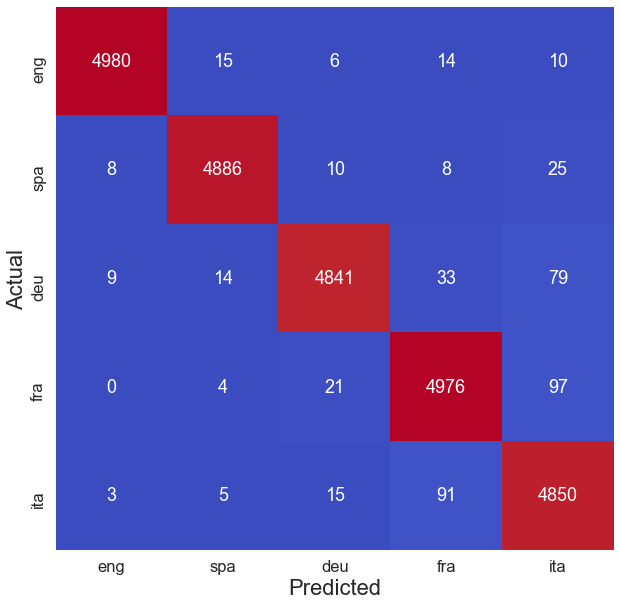

In [45]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

x_test = test_feat.drop('lang',axis=1)
y_test = test_feat['lang']

# Get predictions on test set
labels = model.predict_classes(x_test)
# reverse encode languages
predictions = encoder.inverse_transform(labels)

# Accuracy on test set
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

# Confusion matrix to view accuracy
lang = ['eng', 'spa', 'deu', 'fra', 'ita']
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, columns = lang, index = lang)
 
# Plot confusion matrix 
plt.figure(figsize = (10, 10), facecolor = 'w', edgecolor = 'k')
sns.set(font_scale = 1.5)
sns.heatmap(conf_matrix_df, cmap='coolwarm', annot = True, fmt = '.5g', cbar = False)
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('Actual', fontsize=22)

In [46]:
print(accuracy)

0.98132


In [ ]:
# eng incorrectly predicted as spanish 15 times
# eng incorrectly predicted as German 6 times
# French incorrectly predicted as Italian 97 times